In [105]:
import pandas as pd

In [106]:
df = pd.read_csv('Weather.csv')
df.head(3)

C:\Users\tirum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [108]:
df.keys()

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [109]:
import seaborn as sns

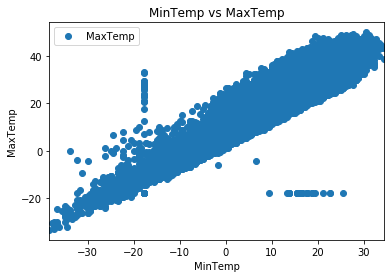

In [110]:
df.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

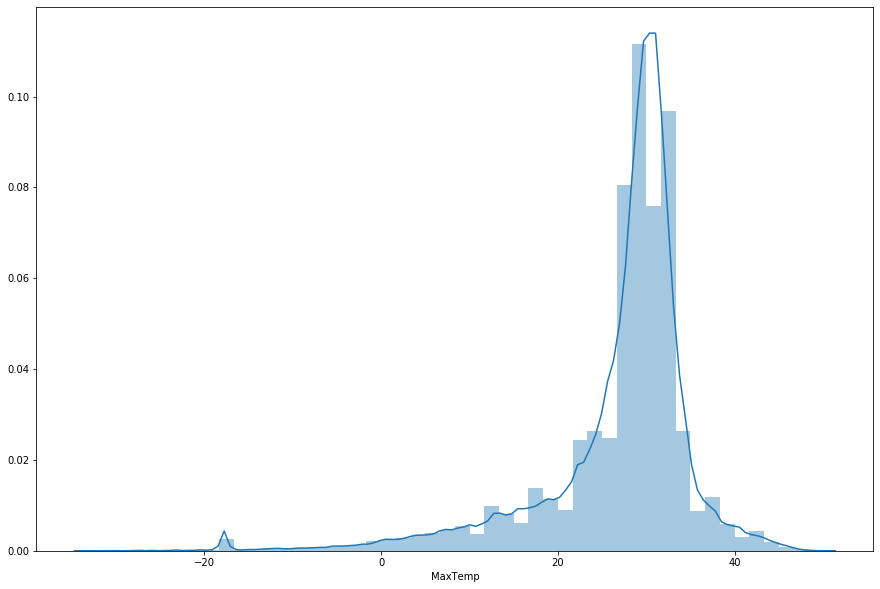

In [111]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['MaxTemp'])

In [87]:
X = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [90]:
lr = LinearRegression()

In [91]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_pred = lr.predict(X_test)

In [93]:
y_pred[5]

array([34.6829425])

In [94]:
y_test[5]

array([30.55555556])

In [95]:
lr.score(X_test,y_test)

0.7734331678670674

In [96]:
lr.coef_

array([[0.9182608]])

In [97]:
lr.intercept_

array([10.70613271])

In [98]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,22.777778,22.439465
1,25.000000,23.969900
2,19.444444,21.419175
3,26.111111,23.969900
4,12.777778,12.236567
5,30.555556,34.682942
6,14.444444,16.827871
7,28.888889,29.071349
8,24.444444,29.581494
9,26.111111,30.091638


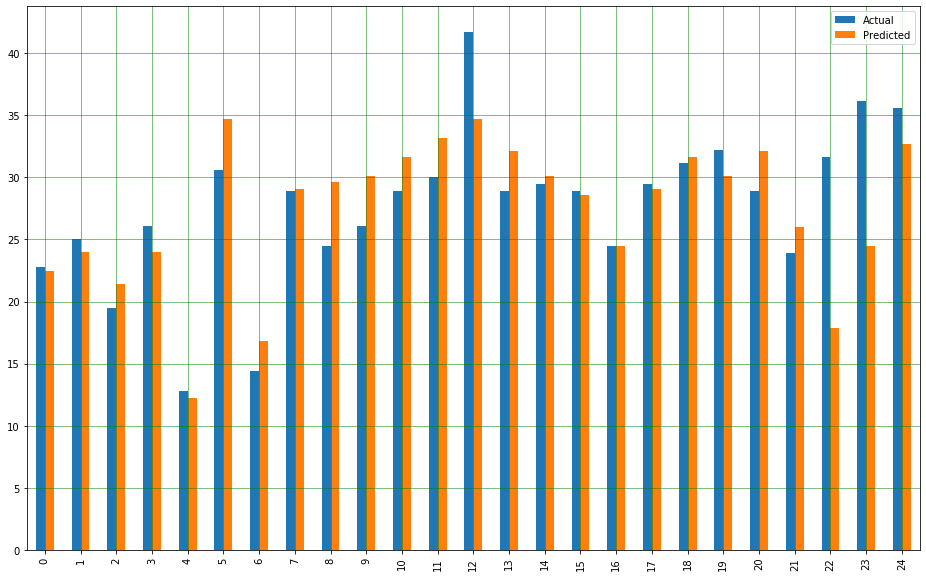

In [99]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

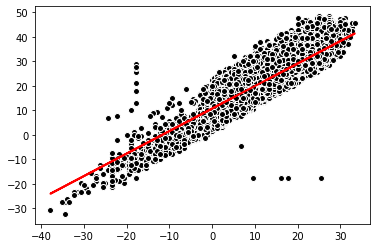

In [100]:
plt.scatter(X_test, y_test,  color='k',edgecolors='white')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [101]:
from sklearn import metrics

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1903178613409096
Mean Squared Error: 17.59373027711308
Root Mean Squared Error: 4.194488082843136
